<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Import libraries

import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset

df = pd.read_csv('transfusion.data')

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
# Read dataset

df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.shape

(748, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
df.nunique()

Recency (months)                              31
Frequency (times)                             33
Monetary (c.c. blood)                         33
Time (months)                                 78
whether he/she donated blood in March 2007     2
dtype: int64

In [7]:
df.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


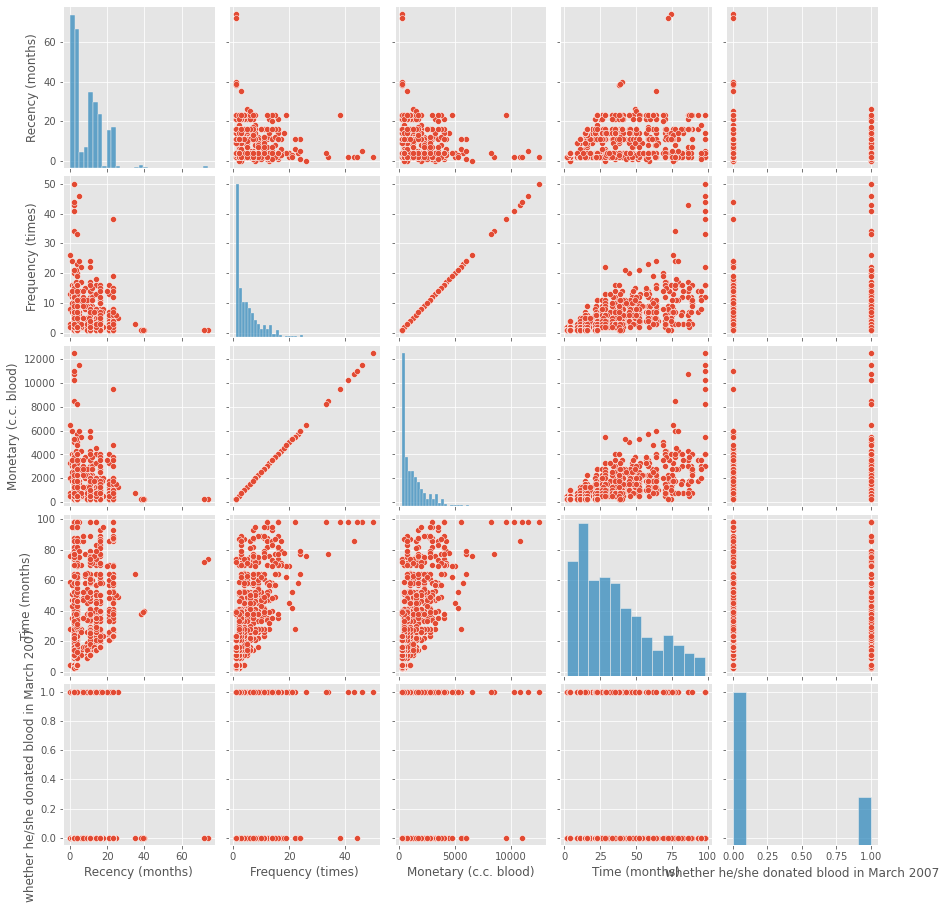

In [8]:
sns.pairplot(df);

In [9]:
df.rename(columns={'Recency (months)': 'Last_Donation', 'Frequency (times)': 'Total_Donation', \
                   'Monetary (c.c. blood)': 'Amount_blood', 'Time (months)': 'First_donation', \
                   'whether he/she donated blood in March 2007': 'Donation_Status'}, inplace=True)

In [10]:
df.columns

Index(['Last_Donation', 'Total_Donation', 'Amount_blood', 'First_donation',
       'Donation_Status'],
      dtype='object')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [11]:
X = df.drop('Donation_Status', axis=1)
y = df['Donation_Status']

In [12]:
correlations = df.corr()
pd.DataFrame(correlations['Donation_Status']).sort_values(by='Donation_Status', ascending=False)

,Donation_Status
Donation_Status,1.000000
Total_Donation,0.218633
Amount_blood,0.218633
First_donation,-0.035854
Last_Donation,-0.279869


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [13]:
y.value_counts()

0    570
1    178
Name: Donation_Status, dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [15]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
# To balance the dataset, use the Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [17]:
# Logistic Regression

lr = LogisticRegression()

In [18]:
# fit the model

lr.fit(X, y)

LogisticRegression()

In [19]:
# predicted value of X_test

y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0]


In [20]:
len(y_pred_lr)

225

In [21]:
# Accuracy of the prediction

print("Accuracy Score : ")
accuracy_score(y_test, y_pred_lr)

Accuracy Score : 


0.7555555555555555

In [22]:
y_test

258    0
521    1
14     1
31     1
505    1
      ..
267    0
362    0
501    1
310    0
200    0
Name: Donation_Status, Length: 225, dtype: int64

In [23]:
y_pred_lr

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [24]:
# Confusion Matrix

confusion_matrix(y_test, y_pred_lr)

array([[160,   4],
       [ 51,  10]], dtype=int64)

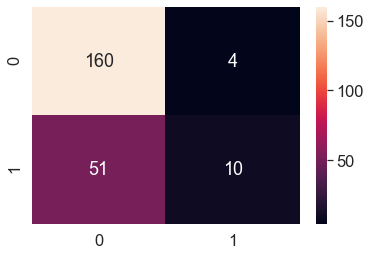

In [25]:
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [26]:
# label confusion matrix by converting it into a dataframe

def deconfusion_matrix(y_test, y_pred_lr):
    cm = confusion_matrix(y_test, y_pred_lr)
    
    tp = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[0][0]
    
    cm = {
        'Predicted (Positive)': [tp, fp],
        'Predicted (Negative)': [fn, tn],
    }

    df = pd.DataFrame(cm, columns = ['Predicted (Positive)', 'Predicted (Negative)'], 
                      index=['Actual (Positive)', 'Actual (Negative)'])
    
    return df
    
dcm = deconfusion_matrix(y_test, y_pred_lr)
dcm

,Predicted (Positive),Predicted (Negative)
Actual (Positive),10,51
Actual (Negative),4,160


In [27]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred_lr)))

Precision score: 0.7142857142857143


In [28]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred_lr)))

Recall score: 0.16393442622950818


In [29]:
from sklearn.metrics import f1_score

print("F1 Score: {}".format(f1_score(y_test,y_pred_lr)))

F1 Score: 0.26666666666666666


In [30]:
from sklearn.metrics import roc_auc_score

# Generate the prediction values for each of the test observations using predict_proba() function 
preds = lr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

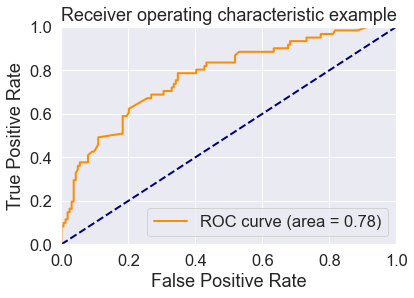

In [31]:
# Plot the ROC Curve

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [32]:
# split into 70:30 ration

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (523, 4)
Number transactions y_train dataset:  (523,)
Number transactions X_test dataset:  (225, 4)
Number transactions y_test dataset:  (225,)


In [33]:
# Create the SVM model

svc = SVC(kernel='linear')

In [34]:
# Fit the model

svc.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
pred_svc = svc.predict(X_test)
  
# print classification report
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       164
           1       0.00      0.00      0.00        61

    accuracy                           0.73       225
   macro avg       0.36      0.50      0.42       225
weighted avg       0.53      0.73      0.61       225



In [36]:
!pip install imblearn

In [37]:
# Using SMOTE algorithm 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 117
Before OverSampling, counts of label '0': 406 



In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (812, 4)
After OverSampling, the shape of train_y: (812,) 

After OverSampling, counts of label '1': 406
After OverSampling, counts of label '0': 406


# Step 9: Fit the Model

In [39]:
# Recreate and refit SVM 

svc_1 = SVC(kernel='linear', probability=True)

In [40]:
svc_1.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [41]:
# Test the scores for prediction with SVM after SMOTE

pred_svc_1 = svc_1.predict(X_test)
  
# print classification report
print(classification_report(y_test, pred_svc_1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       164
           1       0.00      0.00      0.00        61

    accuracy                           0.73       225
   macro avg       0.36      0.50      0.42       225
weighted avg       0.53      0.73      0.61       225



In [42]:
# Generate the prediction values for each of the test observations using predict_proba() function 
preds_svc = svc_1.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds_svc)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

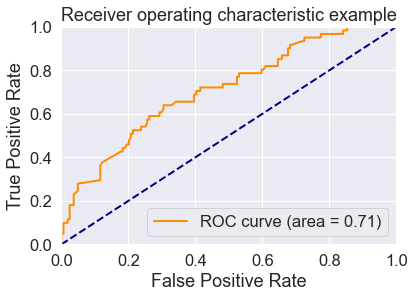

In [43]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [44]:
# Create a KNN model

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=13)

In [45]:
# Fit this model

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [46]:
# Predict the accuracy

knn_pred = knn.predict(X_test)

In [47]:
# Estimate the accuracy score

knn.score(X_test, y_test)

0.7422222222222222

In [48]:
print(classification_report(y_test, knn_pred))



              precision    recall  f1-score   support

           0       0.74      0.99      0.85       164
           1       0.71      0.08      0.15        61

    accuracy                           0.74       225
   macro avg       0.73      0.53      0.50       225
weighted avg       0.74      0.74      0.66       225



In [49]:
1-y_train.mean()

0.7762906309751434

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [50]:
# create lists 

num_neighbors = []    
test_accuracies = []

# plot test accuracy by number of neighbors:

start = 1
stop = len(X_train)+1

for k in range(start, 20):
    
    # instantiate model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # fit and score
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    
    #append to list
    num_neighbors.append(k)
    test_accuracies.append(score)

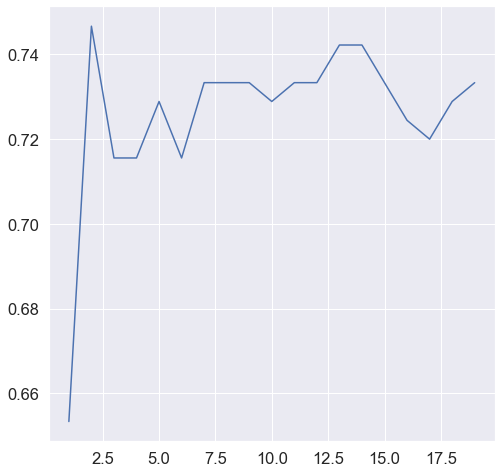

In [51]:
plt.figure(figsize=(8,8))
plt.plot(num_neighbors, test_accuracies);


In [52]:
# Create Decision Tree

dt_clf = DecisionTreeClassifier(random_state=1234, criterion='gini', max_depth=3) #replace with 'entropy'

In [53]:
# Fit the model

dt_model = dt_clf.fit(X, y)

In [54]:
text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_0 <= 6.50
|   |--- feature_1 <= 4.50
|   |   |--- feature_3 <= 17.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  17.00
|   |   |   |--- class: 0
|   |--- feature_1 >  4.50
|   |   |--- feature_3 <= 49.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  49.50
|   |   |   |--- class: 0
|--- feature_0 >  6.50
|   |--- feature_0 <= 14.50
|   |   |--- feature_3 <= 15.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  15.50
|   |   |   |--- class: 0
|   |--- feature_0 >  14.50
|   |   |--- feature_1 <= 4.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  4.50
|   |   |   |--- class: 0



In [55]:
with open("decision_tree.log", "w") as f:
    f.write(text_representation)

In [56]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Donation_Status, dtype: int64

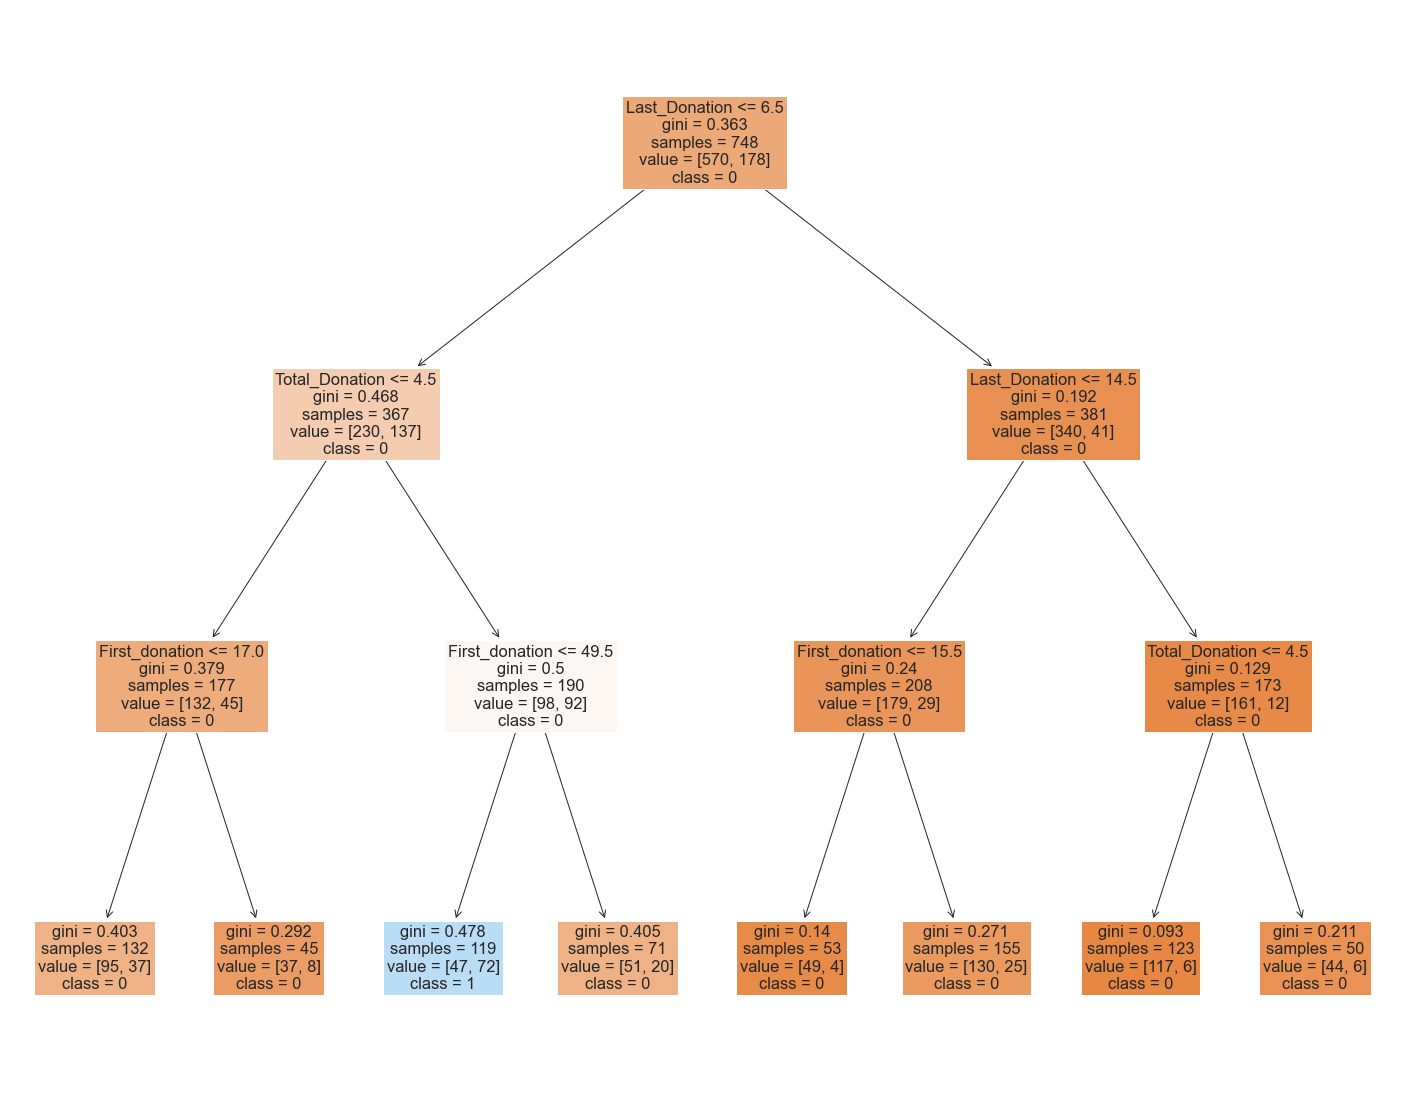

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True)

In [61]:
# Predict the accuracy

dt_pred = dt_clf.predict(X_test)

In [62]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, dt_pred))

Accuracy Score:  0.7866666666666666


In [63]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       164
           1       0.68      0.41      0.51        61

    accuracy                           0.79       225
   macro avg       0.74      0.67      0.69       225
weighted avg       0.77      0.79      0.77       225



In [64]:
# Generate the prediction values for each of the test observations using predict_proba() function 
preds_dt = dt_clf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds_dt)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

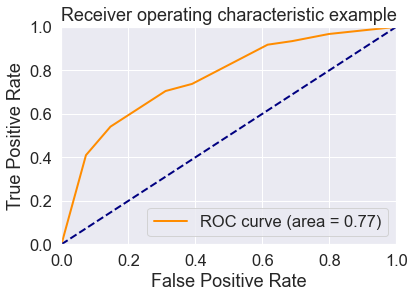

In [65]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



